# Домашнее задание 1. Первичный анализ данных.

## 1 часть (основная) (15 баллов)

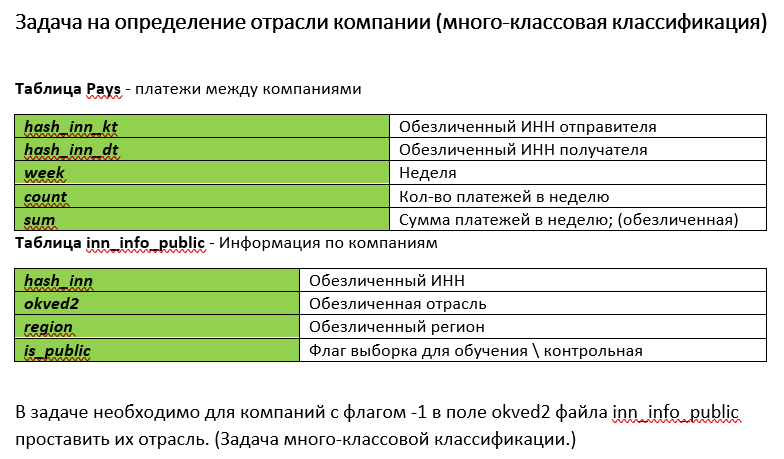

### Задание 0 (0 баллов)

Загрузите данные, проверьте на пропуски.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
inns_df = pd.read_csv(os.path.join('data', 'inn_info_public.csv'))
pays_df = pd.read_csv(os.path.join('data', 'pays.csv'))

In [3]:
inns_df.sample(5)

,hash_inn,okved2,region,is_public
82427,259871,-1,80,False
4754,51694,12,60,True
171002,119393,12,17,True
70062,33036,62,43,True
212510,200358,11,61,True


In [4]:
pays_df.sample(5)

,hash_inn_kt,hash_inn_dt,week,count,sum
2035564,92978,101117,6,3,719.600
941264,43206,229465,9,2,0.440
4440832,212530,96617,1,2,0.740
3836732,183464,3695,8,2,10.800
865939,38942,169655,19,2,5.572


In [5]:
# проверим есть ли пропуски

In [6]:
inns_df.isna().sum()

hash_inn     0
okved2       0
region       0
is_public    0
dtype: int64

In [7]:
pays_df.isna().sum()

hash_inn_kt       0
hash_inn_dt       0
week              0
count             0
sum            1125
dtype: int64

In [8]:
# в дадафрейме pays_df есть пропуски в колонке sum, посмотрим на эти строки

In [9]:
pays_df[pays_df['sum'].isna()==True].head()

,hash_inn_kt,hash_inn_dt,week,count,sum
2400,263,263,12,0,NaN
2401,263,263,13,0,NaN
2402,263,263,14,0,NaN
73323,3430,3430,19,0,NaN
74124,3493,3493,8,0,NaN


In [10]:
(pays_df[pays_df['sum'].isna()==True]['count'] == 0).all()

True

In [11]:
# видим, что sum (сумма платежей в неделю) имеет значение NaN в виду того, что count (кол-во платежей в неделю) равны нулю
# поэтому логично заменить значения NaN в sum на нули

In [12]:
pays_df['sum'] = pays_df['sum'].fillna(0)

In [13]:
pays_df.isna().sum()

hash_inn_kt    0
hash_inn_dt    0
week           0
count          0
sum            0
dtype: int64

In [14]:
# теперь пропусков нет, идём дальше

### Задание 1 (1 балл)

По данным таблицы inn_info_public найти количество объектов для каждой отрасли (где она известна). Постройте countplot. Проинтерпретируете полученные результаты, что можно сказать про распределение?   

In [15]:
inns_df.shape

(240069, 4)

In [16]:
inns_df['hash_inn'].nunique()

240069

In [17]:
# видим, что все ИНН уникальные (число уникальный значений равно кол-ву строк) т.о. каждый объект встречается 1 раз

In [18]:
# далее разделим имеющийся дадасет inns_df на обучаемою и тестовую выборку 
# (т.о. в тренировочной выборке остануться только известные отрасли)

In [19]:
train_inns_df = inns_df[inns_df['is_public']==True]
test_inns_df = inns_df[inns_df['is_public']==False]

In [20]:
# найдём кол-во объектов для каждой известной отрасли (т.к. каждый объект встречается 1 раз)
train_inf = train_inns_df.groupby('okved2')[['hash_inn']].count()
train_inf = train_inf.rename(columns = {'hash_inn':'count_of_hash_inn'})
train_inf.head()

,count_of_hash_inn
okved2,
0,815
1,50
2,90
3,842
4,7617


In [21]:
test_inf = test_inns_df.groupby('okved2')[['hash_inn']].count()
test_inf = test_inf.rename(columns = {'hash_inn':'count_of_hash_inn'})
test_inf

,count_of_hash_inn
okved2,
-1,78654


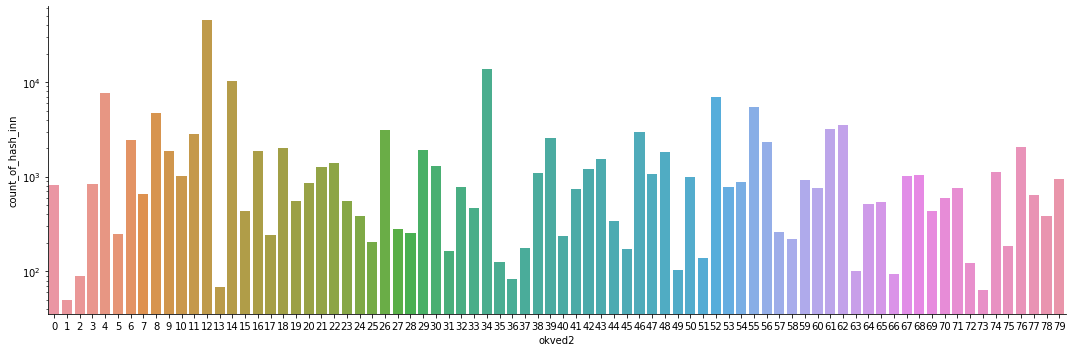

In [22]:
# построим countplot (в логарифмической шкале)
sns.catplot(x='okved2', y='count_of_hash_inn', kind='bar', data=train_inf.reset_index(), height=5, aspect=3, log=True);

In [23]:
# Известных отраслей всего 80. В каждой отрасли различное кол-во объектов. Распределение далеко от равномерного.
# в каждой отрасли присутсвует различное кол-во объектов, но тем не менее, везде присутствуют

### Задание 2 (2 балла)

По данным таблиц pays и inn_info_public для каждого получателя и каждого отправителя найдите среднее количество платежей в неделю и средний платеж. Для получателей и отправителей постройте гистограммы распределений среднего количества платежей в неделю и среднего платежа отдельно для тренеровочных данных (is_public=0) и отдельно для тестовых данных (is_public=1). Проинтерпретируюте графики, что можно сказать про распределения? Сравните соответствующие гистограммы для тестовых и тренеровочных данных, сделаете выводы о репрезентативности разбиения.

In [24]:
# посмотрим немонго на данные

In [25]:
pays_df.sort_values(['hash_inn_kt', 'week'])

,hash_inn_kt,hash_inn_dt,week,count,sum
0,0,0,1,4,38399.600
23,0,53971,1,3,2635.624
27,0,57889,2,3,-0.176
29,0,70994,2,6,30190.324
76,0,203119,2,3,1219.200
...,...,...,...,...,...
5430145,260511,77935,5,2,399.600
5430149,260511,260511,10,2,7.600
5430146,260511,77935,12,2,439.600
5430147,260511,77935,14,2,7.600


In [26]:
np.array(sorted(pays_df.week.unique()))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [27]:
# кол-во недель:
pays_df.week.nunique()

24

In [28]:
# первичный анализ показывает, что один и тот же отправитель может совершать несколько сделок в одну и ту же неделю
# следовательно агрегатор mean() не подойдёт
# вего недель 24 - будем делить общее кол-во платежей на кол-во недель 24 (на весь интервал), чтобы найти среднее кол-во платежей в неделю.
# чтобы найти средний платёж - поделим общую сумму платежей на кол-во платежей

In [29]:
# для каждого отправителя
sender_df = pays_df.groupby('hash_inn_kt')[['count', 'sum']].sum()
sender_df['avg_count_per_weer'] = sender_df['count'] / 24.
sender_df['avg_sum'] = sender_df['sum'] / sender_df['count']

sender_df.head(10)

,count,sum,avg_count_per_weer,avg_sum
hash_inn_kt,,,,
0,194,253520.588,8.083333,1306.807155
1,14,138.000,0.583333,9.857143
2,5,36.240,0.208333,7.248000
3,1,13.948,0.041667,13.948000
4,18,10.160,0.750000,0.564444
5,46,296.920,1.916667,6.454783
6,1,8.800,0.041667,8.800000
7,140,33541.568,5.833333,239.582629
8,40,3620.880,1.666667,90.522000


In [30]:
sender_df.shape

(152160, 4)

In [31]:
sender_df.isna().sum()

count                 0
sum                   0
avg_count_per_weer    0
avg_sum               2
dtype: int64

In [32]:
sender_df[sender_df['avg_sum'].isna() == True]

,count,sum,avg_count_per_weer,avg_sum
hash_inn_kt,,,,
102862,0,0.0,0.0,NaN
117096,0,0.0,0.0,NaN


In [33]:
# в результате деления на ноль возникли NaN, уберём их
sender_df = sender_df.fillna(0)

In [34]:
sender_df.isna().sum() # всё в порядке, идём дальше

count                 0
sum                   0
avg_count_per_weer    0
avg_sum               0
dtype: int64

In [35]:
# аналогично для каждого получателя
recipient_df = pays_df.groupby('hash_inn_dt')[['count', 'sum']].sum()
recipient_df['avg_count_per_weer'] = recipient_df['count'] / 24.
recipient_df['avg_sum'] = recipient_df['sum'] / recipient_df['count']

recipient_df.head(10)

,count,sum,avg_count_per_weer,avg_sum
hash_inn_dt,,,,
0,1077,172026.108,44.875000,159.727120
2,29,427.484,1.208333,14.740828
5,38,122.668,1.583333,3.228105
7,17,7809.116,0.708333,459.359765
10,72,152.616,3.000000,2.119667
11,9,511.800,0.375000,56.866667
13,8,1068.284,0.333333,133.535500
15,1,2.640,0.041667,2.640000
16,22,93.996,0.916667,4.272545


In [36]:
recipient_df.shape

(189772, 4)

In [37]:
recipient_df.isna().sum()

count                 0
sum                   0
avg_count_per_weer    0
avg_sum               2
dtype: int64

In [38]:
recipient_df[recipient_df.isna().values]

,count,sum,avg_count_per_weer,avg_sum
hash_inn_dt,,,,
75120,0,0.0,0.0,NaN
87315,0,0.0,0.0,NaN


In [39]:
# в результате деления на ноль возникли NaN, уберём их
recipient_df = recipient_df.fillna(0)

In [40]:
recipient_df.isna().sum()

count                 0
sum                   0
avg_count_per_weer    0
avg_sum               0
dtype: int64

In [41]:
inns_df = inns_df.set_index('hash_inn')
inns_df

,okved2,region,is_public
hash_inn,,,
61058,34,86,True
8311,18,86,True
130273,-1,86,False
64081,43,86,True
218005,12,86,True
...,...,...,...
139170,4,12,True
13553,12,12,True
230402,12,12,True


In [42]:
df_sender = pd.merge(left=inns_df, right=sender_df[['avg_count_per_weer', 'avg_sum']], how='left', left_index=True, right_index=True)
df_sender

,okved2,region,is_public,avg_count_per_weer,avg_sum
hash_inn,,,,,
61058,34,86,True,NaN,NaN
8311,18,86,True,NaN,NaN
130273,-1,86,False,0.166667,152.800000
64081,43,86,True,NaN,NaN
218005,12,86,True,0.833333,38.975000
...,...,...,...,...,...
139170,4,12,True,40.458333,204.121265
13553,12,12,True,0.916667,9.605455
230402,12,12,True,2.208333,81.718415


In [43]:
df_sender.isna().sum()

okved2                    0
region                    0
is_public                 0
avg_count_per_weer    87909
avg_sum               87909
dtype: int64

In [44]:
df_sender = df_sender.fillna(0)
df_sender

,okved2,region,is_public,avg_count_per_weer,avg_sum
hash_inn,,,,,
61058,34,86,True,0.000000,0.000000
8311,18,86,True,0.000000,0.000000
130273,-1,86,False,0.166667,152.800000
64081,43,86,True,0.000000,0.000000
218005,12,86,True,0.833333,38.975000
...,...,...,...,...,...
139170,4,12,True,40.458333,204.121265
13553,12,12,True,0.916667,9.605455
230402,12,12,True,2.208333,81.718415


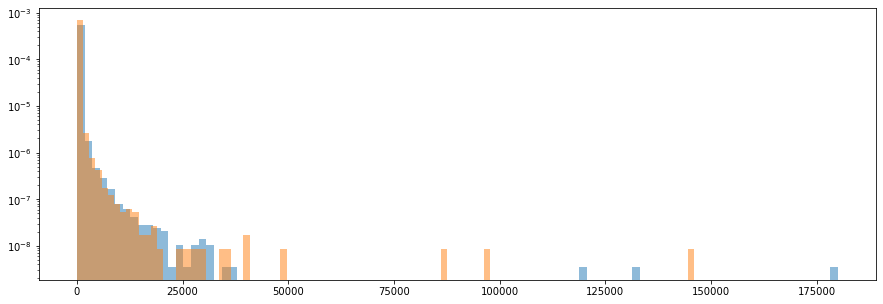

In [45]:
# построим гистограммы для оправителей
plt.figure(figsize=(15,5))
plt.hist(df_sender[df_sender['is_public'] == True]['avg_sum'].values, bins=100, log=True, density=True, histtype='barstacked', alpha=0.5);
plt.hist(df_sender[df_sender['is_public'] == False]['avg_sum'].values, bins=100, log=True, density=True, histtype='barstacked', alpha=0.5);

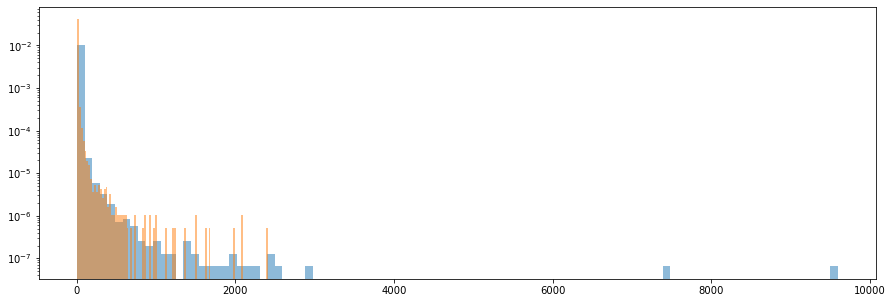

In [46]:
plt.figure(figsize=(15,5))
plt.hist(df_sender[df_sender['is_public'] == True]['avg_count_per_weer'].values, bins=100, log=True, density=True, histtype='barstacked', alpha=0.5);
plt.hist(df_sender[df_sender['is_public'] == False]['avg_count_per_weer'].values, bins=100, log=True, density=True, histtype='barstacked', alpha=0.5);

In [47]:
df_recipient = pd.merge(left=inns_df, right=recipient_df[['avg_count_per_weer', 'avg_sum']], how='left', left_index=True, right_index=True)
df_recipient

,okved2,region,is_public,avg_count_per_weer,avg_sum
hash_inn,,,,,
61058,34,86,True,0.500000,7.454667
8311,18,86,True,0.458333,3.632727
130273,-1,86,False,2.958333,129.416901
64081,43,86,True,0.916667,9.630364
218005,12,86,True,NaN,NaN
...,...,...,...,...,...
139170,4,12,True,211.583333,35.024934
13553,12,12,True,NaN,NaN
230402,12,12,True,4.000000,58.627292


In [48]:
df_recipient.isna().sum()

okved2                    0
region                    0
is_public                 0
avg_count_per_weer    50299
avg_sum               50299
dtype: int64

In [49]:
df_recipient = df_recipient.fillna(0)
df_recipient

,okved2,region,is_public,avg_count_per_weer,avg_sum
hash_inn,,,,,
61058,34,86,True,0.500000,7.454667
8311,18,86,True,0.458333,3.632727
130273,-1,86,False,2.958333,129.416901
64081,43,86,True,0.916667,9.630364
218005,12,86,True,0.000000,0.000000
...,...,...,...,...,...
139170,4,12,True,211.583333,35.024934
13553,12,12,True,0.000000,0.000000
230402,12,12,True,4.000000,58.627292


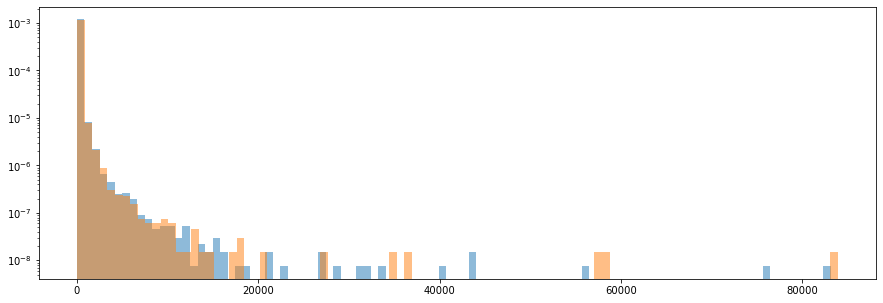

In [50]:
# построим гистограммы получателей
plt.figure(figsize=(15,5))
plt.hist(df_recipient[df_recipient['is_public'] == True]['avg_sum'].values, bins=100, log=True, density=True, histtype='barstacked', alpha=0.5);
plt.hist(df_recipient[df_recipient['is_public'] == False]['avg_sum'].values, bins=100, log=True, density=True, histtype='barstacked', alpha=0.5);

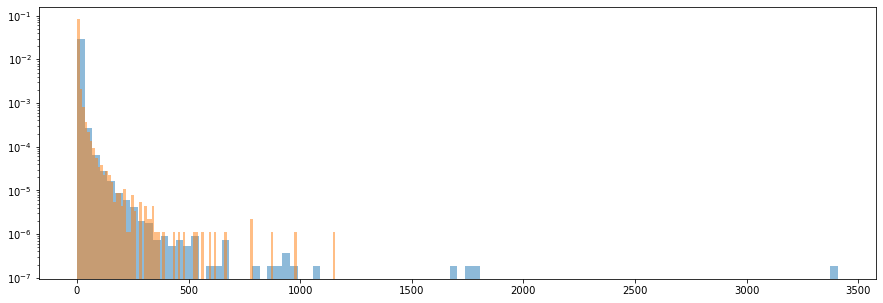

In [51]:
plt.figure(figsize=(15,5))
plt.hist(df_recipient[df_recipient['is_public'] == True]['avg_count_per_weer'].values, bins=100, log=True, density=True, histtype='barstacked', alpha=0.5);
plt.hist(df_recipient[df_recipient['is_public'] == False]['avg_count_per_weer'].values, bins=100, log=True, density=True, histtype='barstacked', alpha=0.5);

In [52]:
# также для наглядности можно построить boxplot игнорируя выбросы (showfliers=False)

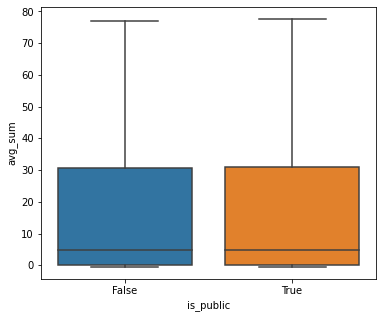

In [53]:
plt.figure(figsize=(6,5))
sns.boxplot(x='is_public',y='avg_sum', data=df_sender[df_sender['is_public'].isin([True, False])], showfliers=False);

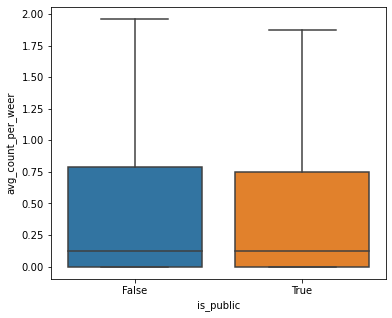

In [54]:
plt.figure(figsize=(6,5))
sns.boxplot(x='is_public',y='avg_count_per_weer', data=df_sender[df_sender['is_public'].isin([True, False])], showfliers=False);

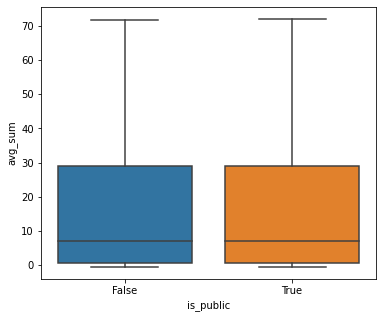

In [55]:
plt.figure(figsize=(6,5))
sns.boxplot(x='is_public',y='avg_sum', data=df_recipient[df_recipient['is_public'].isin([True, False])], showfliers=False);

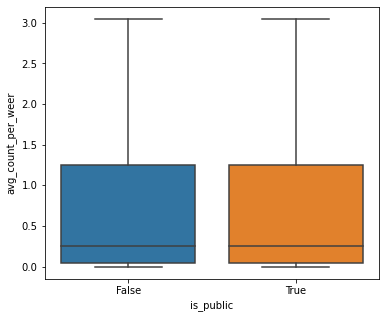

In [56]:
plt.figure(figsize=(6,5))
sns.boxplot(x='is_public',y='avg_count_per_weer', data=df_recipient[df_recipient['is_public'].isin([True, False])], showfliers=False);

In [57]:
# наблюдаем, что тренировочный и тестовый дадасеты в целом походят друг на друга
# разбиение репрезентативно

### Задание 3 (1 балл)

Создайте копию таблицы inn_info_public и присоедините к ней таблицу, полученную в задании 2 по полю hash_inn. Обработайте пропуски.

In [58]:
df = inns_df.copy()

In [59]:
df = pd.merge(left=df, right=sender_df[['avg_count_per_weer', 'avg_sum']], how='left', left_index=True, right_index=True)
df

,okved2,region,is_public,avg_count_per_weer,avg_sum
hash_inn,,,,,
61058,34,86,True,NaN,NaN
8311,18,86,True,NaN,NaN
130273,-1,86,False,0.166667,152.800000
64081,43,86,True,NaN,NaN
218005,12,86,True,0.833333,38.975000
...,...,...,...,...,...
139170,4,12,True,40.458333,204.121265
13553,12,12,True,0.916667,9.605455
230402,12,12,True,2.208333,81.718415


In [60]:
df = pd.merge(left=df, right=recipient_df[['avg_count_per_weer', 'avg_sum']], how='left', left_index=True, right_index=True, suffixes=('_out', '_in'))
df

,okved2,region,is_public,avg_count_per_weer_out,avg_sum_out,avg_count_per_weer_in,avg_sum_in
hash_inn,,,,,,,
61058,34,86,True,NaN,NaN,0.500000,7.454667
8311,18,86,True,NaN,NaN,0.458333,3.632727
130273,-1,86,False,0.166667,152.800000,2.958333,129.416901
64081,43,86,True,NaN,NaN,0.916667,9.630364
218005,12,86,True,0.833333,38.975000,NaN,NaN
...,...,...,...,...,...,...,...
139170,4,12,True,40.458333,204.121265,211.583333,35.024934
13553,12,12,True,0.916667,9.605455,NaN,NaN
230402,12,12,True,2.208333,81.718415,4.000000,58.627292


In [61]:
df = df.fillna(0)
df

,okved2,region,is_public,avg_count_per_weer_out,avg_sum_out,avg_count_per_weer_in,avg_sum_in
hash_inn,,,,,,,
61058,34,86,True,0.000000,0.000000,0.500000,7.454667
8311,18,86,True,0.000000,0.000000,0.458333,3.632727
130273,-1,86,False,0.166667,152.800000,2.958333,129.416901
64081,43,86,True,0.000000,0.000000,0.916667,9.630364
218005,12,86,True,0.833333,38.975000,0.000000,0.000000
...,...,...,...,...,...,...,...
139170,4,12,True,40.458333,204.121265,211.583333,35.024934
13553,12,12,True,0.916667,9.605455,0.000000,0.000000
230402,12,12,True,2.208333,81.718415,4.000000,58.627292


### Задание 4 (1 балл)

Для каждой организации в таблице pays найдите количество организаций от которых поступили платежи, и количество организаций в адрес которых были осуществлены платежи. Результат присоедините к таблице полученной в задании 3 по полю hash_inn. Обработайте пропуски.

In [62]:
# сгруппируем по отправителям и пременим функциею nunique для получателей - так найдём кол-во организаций в адрес которых были платежи от каждого отправителя

In [63]:
count_out_df = pays_df.groupby('hash_inn_kt')[['hash_inn_dt']].nunique().rename(columns = {'hash_inn_dt':'count_out'})
count_out_df

,count_out
hash_inn_kt,
0,34
1,1
2,3
3,1
4,6
...,...
260504,14
260507,1
260509,26


In [64]:
# аналогично найдём кол-во организаций от которых были платежи каждому получателю
count_in_df = pays_df.groupby('hash_inn_dt')[['hash_inn_kt']].nunique().rename(columns = {'hash_inn_kt':'count_in'})
count_in_df

,count_in
hash_inn_dt,
0,144
2,1
5,5
7,6
10,9
...,...
260511,6
260512,3
260513,1


In [65]:
df = df.sort_index()

In [66]:
df

,okved2,region,is_public,avg_count_per_weer_out,avg_sum_out,avg_count_per_weer_in,avg_sum_in
hash_inn,,,,,,,
0,-1,84,False,8.083333,1306.807155,44.875000,159.727120
1,62,26,True,0.583333,9.857143,0.000000,0.000000
2,-1,58,False,0.208333,7.248000,1.208333,14.740828
3,29,60,True,0.041667,13.948000,0.000000,0.000000
4,-1,17,False,0.750000,0.564444,0.000000,0.000000
...,...,...,...,...,...,...,...
260511,12,84,True,0.500000,84.466667,0.708333,14.230353
260512,34,26,True,0.000000,0.000000,1.083333,5.165846
260513,12,36,True,0.000000,0.000000,0.083333,16.448000


In [67]:
df = pd.merge(left=df, right=count_out_df, how='left', left_index=True, right_index=True)
df

,okved2,region,is_public,avg_count_per_weer_out,avg_sum_out,avg_count_per_weer_in,avg_sum_in,count_out
hash_inn,,,,,,,,
0,-1,84,False,8.083333,1306.807155,44.875000,159.727120,34.0
1,62,26,True,0.583333,9.857143,0.000000,0.000000,1.0
2,-1,58,False,0.208333,7.248000,1.208333,14.740828,3.0
3,29,60,True,0.041667,13.948000,0.000000,0.000000,1.0
4,-1,17,False,0.750000,0.564444,0.000000,0.000000,6.0
...,...,...,...,...,...,...,...,...
260511,12,84,True,0.500000,84.466667,0.708333,14.230353,2.0
260512,34,26,True,0.000000,0.000000,1.083333,5.165846,NaN
260513,12,36,True,0.000000,0.000000,0.083333,16.448000,NaN


In [68]:
df = pd.merge(left=df, right=count_in_df, how='left', left_index=True, right_index=True)
df

,okved2,region,is_public,avg_count_per_weer_out,avg_sum_out,avg_count_per_weer_in,avg_sum_in,count_out,count_in
hash_inn,,,,,,,,,
0,-1,84,False,8.083333,1306.807155,44.875000,159.727120,34.0,144.0
1,62,26,True,0.583333,9.857143,0.000000,0.000000,1.0,NaN
2,-1,58,False,0.208333,7.248000,1.208333,14.740828,3.0,1.0
3,29,60,True,0.041667,13.948000,0.000000,0.000000,1.0,NaN
4,-1,17,False,0.750000,0.564444,0.000000,0.000000,6.0,NaN
...,...,...,...,...,...,...,...,...,...
260511,12,84,True,0.500000,84.466667,0.708333,14.230353,2.0,6.0
260512,34,26,True,0.000000,0.000000,1.083333,5.165846,NaN,3.0
260513,12,36,True,0.000000,0.000000,0.083333,16.448000,NaN,1.0


In [69]:
df = df.fillna(0)
df

,okved2,region,is_public,avg_count_per_weer_out,avg_sum_out,avg_count_per_weer_in,avg_sum_in,count_out,count_in
hash_inn,,,,,,,,,
0,-1,84,False,8.083333,1306.807155,44.875000,159.727120,34.0,144.0
1,62,26,True,0.583333,9.857143,0.000000,0.000000,1.0,0.0
2,-1,58,False,0.208333,7.248000,1.208333,14.740828,3.0,1.0
3,29,60,True,0.041667,13.948000,0.000000,0.000000,1.0,0.0
4,-1,17,False,0.750000,0.564444,0.000000,0.000000,6.0,0.0
...,...,...,...,...,...,...,...,...,...
260511,12,84,True,0.500000,84.466667,0.708333,14.230353,2.0,6.0
260512,34,26,True,0.000000,0.000000,1.083333,5.165846,0.0,3.0
260513,12,36,True,0.000000,0.000000,0.083333,16.448000,0.0,1.0


### Задание 5 (2 балла)

Для каждой организации в таблице pays найдите количество отраслей от которых поступили платежи, и количество отраслей в адрес которых были осуществлены платежи. Результат присоедините к таблице полученной в задании 4 по полю hash_inn. Обработайте пропуски.

In [70]:
public_inns_df = inns_df[inns_df.is_public].sort_index().reset_index()
public_inns_df

,hash_inn,okved2,region,is_public
0,1,62,26,True
1,3,29,60,True
2,5,14,85,True
3,7,12,18,True
4,8,11,60,True
...,...,...,...,...
161410,260509,12,84,True
161411,260510,43,58,True
161412,260511,12,84,True
161413,260512,34,26,True


In [71]:
pays_df

,hash_inn_kt,hash_inn_dt,week,count,sum
0,0,0,1,4,38399.6
1,0,0,5,2,399.6
2,0,0,7,2,79.6
3,0,0,9,2,239.6
4,0,0,12,2,79.6
...,...,...,...,...,...
5430145,260511,77935,5,2,399.6
5430146,260511,77935,12,2,439.6
5430147,260511,77935,14,2,7.6
5430148,260511,77935,15,2,79.6


In [72]:
general_kt_df = pd.merge(left=pays_df, right=public_inns_df, how='left', left_on='hash_inn_kt', right_on='hash_inn')
general_kt_df = general_kt_df.rename(columns = {'okved2':'okved2_for_kt'})
general_kt_df

,hash_inn_kt,hash_inn_dt,week,count,sum,hash_inn,okved2_for_kt,region,is_public
0,0,0,1,4,38399.6,NaN,NaN,NaN,NaN
1,0,0,5,2,399.6,NaN,NaN,NaN,NaN
2,0,0,7,2,79.6,NaN,NaN,NaN,NaN
3,0,0,9,2,239.6,NaN,NaN,NaN,NaN
4,0,0,12,2,79.6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5430145,260511,77935,5,2,399.6,260511.0,12.0,84.0,True
5430146,260511,77935,12,2,439.6,260511.0,12.0,84.0,True
5430147,260511,77935,14,2,7.6,260511.0,12.0,84.0,True
5430148,260511,77935,15,2,79.6,260511.0,12.0,84.0,True


In [73]:
# количество отраслей от которых поступили платежи для каждого адреса получателя
okved2_for_kt = general_kt_df.groupby('hash_inn_dt')[['okved2_for_kt']].nunique()
okved2_for_kt

,okved2_for_kt
hash_inn_dt,
0,33
2,1
5,2
7,3
10,3
...,...
260511,4
260512,1
260513,0


In [74]:
okved2_for_kt.isna().sum()

okved2_for_kt    0
dtype: int64

In [75]:
general_dt_df = pd.merge(left=pays_df, right=public_inns_df, how='left', left_on='hash_inn_dt', right_on='hash_inn')
general_dt_df = general_dt_df.rename(columns = {'okved2':'okved2_for_dt'})
general_dt_df

,hash_inn_kt,hash_inn_dt,week,count,sum,hash_inn,okved2_for_dt,region,is_public
0,0,0,1,4,38399.6,NaN,NaN,NaN,NaN
1,0,0,5,2,399.6,NaN,NaN,NaN,NaN
2,0,0,7,2,79.6,NaN,NaN,NaN,NaN
3,0,0,9,2,239.6,NaN,NaN,NaN,NaN
4,0,0,12,2,79.6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5430145,260511,77935,5,2,399.6,77935.0,14.0,84.0,True
5430146,260511,77935,12,2,439.6,77935.0,14.0,84.0,True
5430147,260511,77935,14,2,7.6,77935.0,14.0,84.0,True
5430148,260511,77935,15,2,79.6,77935.0,14.0,84.0,True


In [76]:
# количество отраслей в адрес которых были осуществлены платежи
okved2_for_dt = general_dt_df.groupby('hash_inn_kt')[['okved2_for_dt']].nunique()
okved2_for_dt

,okved2_for_dt
hash_inn_kt,
0,13
1,1
2,1
3,1
4,4
...,...
260504,1
260507,0
260509,6


In [77]:
okved2_for_dt.isna().sum()

okved2_for_dt    0
dtype: int64

In [78]:
df = pd.merge(left=df, right=okved2_for_dt, how='left', left_index=True, right_index=True)
df

,okved2,region,is_public,avg_count_per_weer_out,avg_sum_out,avg_count_per_weer_in,avg_sum_in,count_out,count_in,okved2_for_dt
hash_inn,,,,,,,,,,
0,-1,84,False,8.083333,1306.807155,44.875000,159.727120,34.0,144.0,13.0
1,62,26,True,0.583333,9.857143,0.000000,0.000000,1.0,0.0,1.0
2,-1,58,False,0.208333,7.248000,1.208333,14.740828,3.0,1.0,1.0
3,29,60,True,0.041667,13.948000,0.000000,0.000000,1.0,0.0,1.0
4,-1,17,False,0.750000,0.564444,0.000000,0.000000,6.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...
260511,12,84,True,0.500000,84.466667,0.708333,14.230353,2.0,6.0,2.0
260512,34,26,True,0.000000,0.000000,1.083333,5.165846,0.0,3.0,NaN
260513,12,36,True,0.000000,0.000000,0.083333,16.448000,0.0,1.0,NaN


In [79]:
df = pd.merge(left=df, right=okved2_for_kt, how='left', left_index=True, right_index=True)
df

,okved2,region,is_public,avg_count_per_weer_out,avg_sum_out,avg_count_per_weer_in,avg_sum_in,count_out,count_in,okved2_for_dt,okved2_for_kt
hash_inn,,,,,,,,,,,
0,-1,84,False,8.083333,1306.807155,44.875000,159.727120,34.0,144.0,13.0,33.0
1,62,26,True,0.583333,9.857143,0.000000,0.000000,1.0,0.0,1.0,NaN
2,-1,58,False,0.208333,7.248000,1.208333,14.740828,3.0,1.0,1.0,1.0
3,29,60,True,0.041667,13.948000,0.000000,0.000000,1.0,0.0,1.0,NaN
4,-1,17,False,0.750000,0.564444,0.000000,0.000000,6.0,0.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
260511,12,84,True,0.500000,84.466667,0.708333,14.230353,2.0,6.0,2.0,4.0
260512,34,26,True,0.000000,0.000000,1.083333,5.165846,0.0,3.0,NaN,1.0
260513,12,36,True,0.000000,0.000000,0.083333,16.448000,0.0,1.0,NaN,0.0


In [80]:
df = df.fillna(0)
df

,okved2,region,is_public,avg_count_per_weer_out,avg_sum_out,avg_count_per_weer_in,avg_sum_in,count_out,count_in,okved2_for_dt,okved2_for_kt
hash_inn,,,,,,,,,,,
0,-1,84,False,8.083333,1306.807155,44.875000,159.727120,34.0,144.0,13.0,33.0
1,62,26,True,0.583333,9.857143,0.000000,0.000000,1.0,0.0,1.0,0.0
2,-1,58,False,0.208333,7.248000,1.208333,14.740828,3.0,1.0,1.0,1.0
3,29,60,True,0.041667,13.948000,0.000000,0.000000,1.0,0.0,1.0,0.0
4,-1,17,False,0.750000,0.564444,0.000000,0.000000,6.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
260511,12,84,True,0.500000,84.466667,0.708333,14.230353,2.0,6.0,2.0,4.0
260512,34,26,True,0.000000,0.000000,1.083333,5.165846,0.0,3.0,0.0,1.0
260513,12,36,True,0.000000,0.000000,0.083333,16.448000,0.0,1.0,0.0,0.0


### Задание 6 (3 балла)

Для каждой отрасли (где она известна) найдите среднее и стандартное отклонение среднего количества входящих и исходящих платежей в неделю по всем организациям в этой отрасли, а также среднее и стандартное отклонение среднего входящего и исходящего платежа в формате таблицы. К данной таблице присоедините таблицу, полученную в задании 1 по полю okved2. Для 5 произвольных отраслей постройте boxplot для среднего количества входящих и исходящих платежей в неделю, а также для среднего входящего и исходящего платежа. Проинтерпретируете полученные результаты. На сколько хорошо данные признаки позволяют разделить отрасли между собой?

In [81]:
ex6_mean_per_week = df[df.is_public].groupby('okved2')[['avg_count_per_weer_out','avg_count_per_weer_in']].mean()
ex6_mean_per_week = ex6_mean_per_week.rename(columns={'avg_count_per_weer_out' : 'mean_of_avg_count_per_weer_out',
                                   'avg_count_per_weer_in' : 'mean_of_avg_count_per_weer_in'})
ex6_mean_per_week

,mean_of_avg_count_per_weer_out,mean_of_avg_count_per_weer_in
okved2,,
0,1.384100,2.125051
1,0.623333,1.096667
2,1.406944,5.787963
3,0.997229,0.973129
4,4.100712,4.031820
...,...,...
75,12.182041,3.627451
76,2.838129,2.347944
77,0.928830,1.615942


In [82]:
ex6_std_per_week = df[df.is_public].groupby('okved2')[['avg_count_per_weer_out','avg_count_per_weer_in']].std()
ex6_std_per_week = ex6_std_per_week.rename(columns={'avg_count_per_weer_out' : 'std_of_avg_count_per_weer_out',
                                   'avg_count_per_weer_in' : 'std_of_avg_count_per_weer_in'})
ex6_std_per_week

,std_of_avg_count_per_weer_out,std_of_avg_count_per_weer_in
okved2,,
0,5.250719,10.902871
1,1.420687,1.831137
2,4.531285,12.743222
3,4.269462,2.805243
4,25.293418,20.593011
...,...,...
75,88.615509,10.004570
76,24.670110,23.502644
77,3.914992,3.594343


In [83]:
ex6_mean = df[df.is_public].groupby('okved2')[['avg_sum_out','avg_sum_in']].mean()
ex6_mean = ex6_mean.rename(columns={'avg_sum_out' : 'mean_avg_sum_out',
                                   'avg_sum_in' : 'mean_avg_sum_in'})
ex6_mean

,mean_avg_sum_out,mean_avg_sum_in
okved2,,
0,29.292516,27.323006
1,17.294708,8.623141
2,1878.330234,847.140387
3,17.865750,10.838925
4,85.217689,70.768763
...,...,...
75,27.314369,33.427388
76,55.591717,45.687582
77,12.272490,15.959892


In [84]:
ex6_std = df[df.is_public].groupby('okved2')[['avg_sum_out','avg_sum_in']].std()
ex6_std = ex6_std.rename(columns={'avg_sum_out' : 'std_avg_sum_out',
                                   'avg_sum_in' : 'std_avg_sum_in'})
ex6_std

,std_avg_sum_out,std_avg_sum_in
okved2,,
0,90.382683,97.906639
1,39.735324,14.944483
2,5955.388502,1583.500819
3,119.634553,47.081438
4,678.803738,569.107646
...,...,...
75,105.369745,74.420734
76,326.388748,179.921048
77,56.410608,56.843131


In [85]:
ex6 = ex6_mean_per_week.copy()
ex6 = pd.merge(left=ex6, right=ex6_std_per_week, how='left', left_index=True, right_index=True)
ex6 = pd.merge(left=ex6, right=ex6_mean, how='left', left_index=True, right_index=True)
ex6 = pd.merge(left=ex6, right=ex6_std, how='left', left_index=True, right_index=True)
ex6

,mean_of_avg_count_per_weer_out,mean_of_avg_count_per_weer_in,std_of_avg_count_per_weer_out,std_of_avg_count_per_weer_in,mean_avg_sum_out,mean_avg_sum_in,std_avg_sum_out,std_avg_sum_in
okved2,,,,,,,,
0,1.384100,2.125051,5.250719,10.902871,29.292516,27.323006,90.382683,97.906639
1,0.623333,1.096667,1.420687,1.831137,17.294708,8.623141,39.735324,14.944483
2,1.406944,5.787963,4.531285,12.743222,1878.330234,847.140387,5955.388502,1583.500819
3,0.997229,0.973129,4.269462,2.805243,17.865750,10.838925,119.634553,47.081438
4,4.100712,4.031820,25.293418,20.593011,85.217689,70.768763,678.803738,569.107646
...,...,...,...,...,...,...,...,...
75,12.182041,3.627451,88.615509,10.004570,27.314369,33.427388,105.369745,74.420734
76,2.838129,2.347944,24.670110,23.502644,55.591717,45.687582,326.388748,179.921048
77,0.928830,1.615942,3.914992,3.594343,12.272490,15.959892,56.410608,56.843131


In [86]:
train_inf = pd.merge(left=train_inf, right=ex6, how='left', left_index=True, right_index=True)
train_inf

,count_of_hash_inn,mean_of_avg_count_per_weer_out,mean_of_avg_count_per_weer_in,std_of_avg_count_per_weer_out,std_of_avg_count_per_weer_in,mean_avg_sum_out,mean_avg_sum_in,std_avg_sum_out,std_avg_sum_in
okved2,,,,,,,,,
0,815,1.384100,2.125051,5.250719,10.902871,29.292516,27.323006,90.382683,97.906639
1,50,0.623333,1.096667,1.420687,1.831137,17.294708,8.623141,39.735324,14.944483
2,90,1.406944,5.787963,4.531285,12.743222,1878.330234,847.140387,5955.388502,1583.500819
3,842,0.997229,0.973129,4.269462,2.805243,17.865750,10.838925,119.634553,47.081438
4,7617,4.100712,4.031820,25.293418,20.593011,85.217689,70.768763,678.803738,569.107646
...,...,...,...,...,...,...,...,...,...
75,187,12.182041,3.627451,88.615509,10.004570,27.314369,33.427388,105.369745,74.420734
76,2059,2.838129,2.347944,24.670110,23.502644,55.591717,45.687582,326.388748,179.921048
77,644,0.928830,1.615942,3.914992,3.594343,12.272490,15.959892,56.410608,56.843131


In [87]:
df

,okved2,region,is_public,avg_count_per_weer_out,avg_sum_out,avg_count_per_weer_in,avg_sum_in,count_out,count_in,okved2_for_dt,okved2_for_kt
hash_inn,,,,,,,,,,,
0,-1,84,False,8.083333,1306.807155,44.875000,159.727120,34.0,144.0,13.0,33.0
1,62,26,True,0.583333,9.857143,0.000000,0.000000,1.0,0.0,1.0,0.0
2,-1,58,False,0.208333,7.248000,1.208333,14.740828,3.0,1.0,1.0,1.0
3,29,60,True,0.041667,13.948000,0.000000,0.000000,1.0,0.0,1.0,0.0
4,-1,17,False,0.750000,0.564444,0.000000,0.000000,6.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
260511,12,84,True,0.500000,84.466667,0.708333,14.230353,2.0,6.0,2.0,4.0
260512,34,26,True,0.000000,0.000000,1.083333,5.165846,0.0,3.0,0.0,1.0
260513,12,36,True,0.000000,0.000000,0.083333,16.448000,0.0,1.0,0.0,0.0


In [88]:
# Для 5 произвольных отраслей построим boxplot для среднего количества входящих и исходящих платежей в неделю, 
# а также для среднего входящего и исходящего платежа

In [89]:
sample_of_okved = np.random.randint(79, size=5)

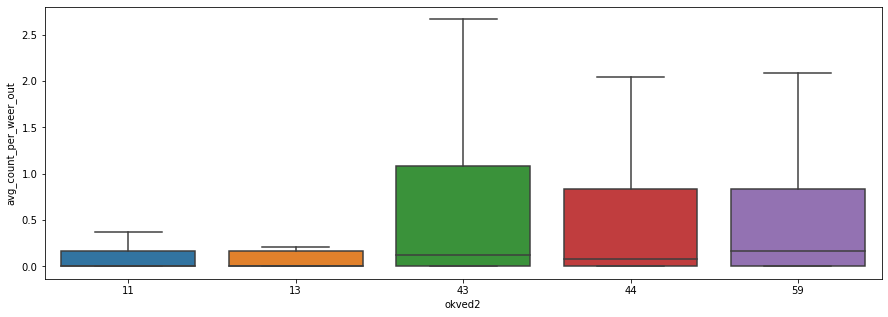

In [90]:
plt.figure(figsize=(15,5))
sns.boxplot(x='okved2',y='avg_count_per_weer_out', data=df[df['okved2'].isin(sample_of_okved)], showfliers=False);

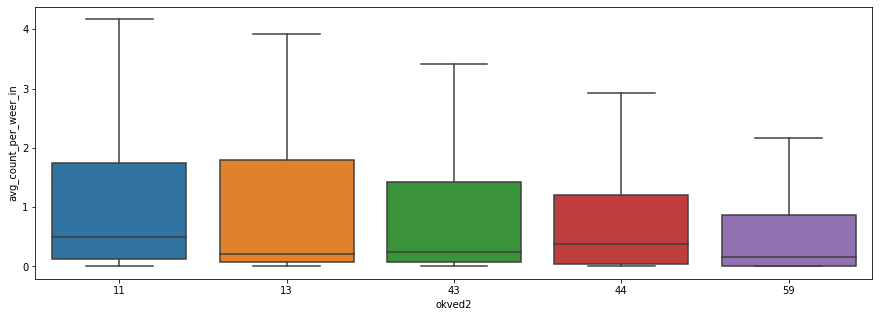

In [91]:
plt.figure(figsize=(15,5))
sns.boxplot(x='okved2',y='avg_count_per_weer_in', data=df[df['okved2'].isin(sample_of_okved)], showfliers=False);

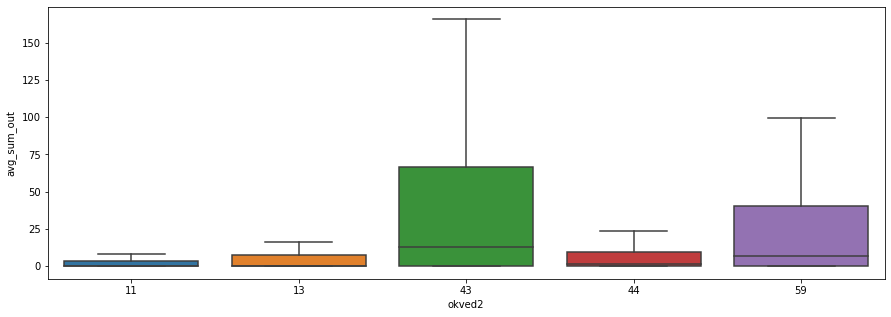

In [92]:
plt.figure(figsize=(15,5))
sns.boxplot(x='okved2',y='avg_sum_out', data=df[df['okved2'].isin(sample_of_okved)], showfliers=False);

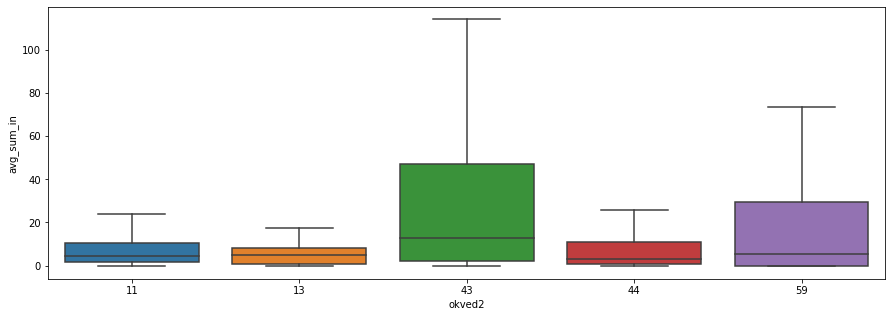

In [93]:
plt.figure(figsize=(15,5))
sns.boxplot(x='okved2',y='avg_sum_in', data=df[df['okved2'].isin(sample_of_okved)], showfliers=False);

In [ ]:
# по одному признаку не всягда хорошо видно разделение отраслей, но по совокупности нескольких признаков, можно уже что-то предположить о некоторых отраслях 

### Задание 7 (3 балла)

Для каждой организации в таблице pays найдите 3 отрасли с наибольшим количеством входящих платежей и исходящих платежей. Результат присоедините к таблице полученной в задании 5 по полю hash_inn. Обработайте пропуски.

In [94]:
# для входящих
general_kt_df

,hash_inn_kt,hash_inn_dt,week,count,sum,hash_inn,okved2_for_kt,region,is_public
0,0,0,1,4,38399.6,NaN,NaN,NaN,NaN
1,0,0,5,2,399.6,NaN,NaN,NaN,NaN
2,0,0,7,2,79.6,NaN,NaN,NaN,NaN
3,0,0,9,2,239.6,NaN,NaN,NaN,NaN
4,0,0,12,2,79.6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5430145,260511,77935,5,2,399.6,260511.0,12.0,84.0,True
5430146,260511,77935,12,2,439.6,260511.0,12.0,84.0,True
5430147,260511,77935,14,2,7.6,260511.0,12.0,84.0,True
5430148,260511,77935,15,2,79.6,260511.0,12.0,84.0,True


In [95]:
g = general_kt_df.groupby(['hash_inn_dt','okved2_for_kt'])[['count']].sum()
g

count
hash_inn_dt okved2_for_kt       
0           3.0                2
            4.0               91
            7.0                2
            8.0              251
            9.0               32
...                          ...
260511      47.0               1
            76.0               2
260512      12.0               4
260514      68.0               2
260515      12.0               3

[549661 rows x 1 columns]

In [96]:
g = g.sort_values(['hash_inn_dt', 'count'],  ascending=[True, False])
g

count
hash_inn_dt okved2_for_kt       
0           8.0              251
            12.0             112
            4.0               91
            76.0              56
            20.0              34
...                          ...
260511      76.0               2
            47.0               1
260512      12.0               4
260514      68.0               2
260515      12.0               3

[549661 rows x 1 columns]

In [97]:
g = g['count'].groupby('hash_inn_dt', group_keys=False)

In [98]:
g = g.apply(lambda x: x.head(3))
g 

hash_inn_dt  okved2_for_kt
0            8.0              251
             12.0             112
             4.0               91
2            12.0              29
5            74.0              10
                             ... 
260511       12.0               6
             76.0               2
260512       12.0               4
260514       68.0               2
260515       12.0               3
Name: count, Length: 305452, dtype: int64

In [99]:
g = pd.DataFrame(g)
g

count
hash_inn_dt okved2_for_kt       
0           8.0              251
            12.0             112
            4.0               91
2           12.0              29
5           74.0              10
...                          ...
260511      12.0               6
            76.0               2
260512      12.0               4
260514      68.0               2
260515      12.0               3

[305452 rows x 1 columns]

In [100]:
g = g.reset_index()
g

,hash_inn_dt,okved2_for_kt,count
0,0,8.0,251
1,0,12.0,112
2,0,4.0,91
3,2,12.0,29
4,5,74.0,10
...,...,...,...
305447,260511,12.0,6
305448,260511,76.0,2
305449,260512,12.0,4
305450,260514,68.0,2


In [101]:
into = pd.pivot_table(g,
               index=['hash_inn_dt'],
               columns=g.groupby(['hash_inn_dt']).cumcount().add(1),
               values=['okved2_for_kt'])
into

okved2_for_kt            
                        1     2     3
hash_inn_dt                          
0                     8.0  12.0   4.0
2                    12.0   NaN   NaN
5                    74.0  56.0   NaN
7                    39.0  12.0  79.0
10                   74.0  12.0  44.0
...                   ...   ...   ...
260510               46.0   NaN   NaN
260511               44.0  12.0  76.0
260512               12.0   NaN   NaN
260514               68.0   NaN   NaN
260515               12.0   NaN   NaN

[163865 rows x 3 columns]

In [102]:
into.columns=into.columns.map('{0[0]}{0[1]}'.format)
into

,okved2_for_kt1,okved2_for_kt2,okved2_for_kt3
hash_inn_dt,,,
0,8.0,12.0,4.0
2,12.0,NaN,NaN
5,74.0,56.0,NaN
7,39.0,12.0,79.0
10,74.0,12.0,44.0
...,...,...,...
260510,46.0,NaN,NaN
260511,44.0,12.0,76.0
260512,12.0,NaN,NaN


In [103]:
into.rename(columns={'okved2_for_kt1': 'Top_1_into', 'okved2_for_kt2': 'Top_2_into', 'okved2_for_kt3': 'Top_3_into'}, inplace=True)
into

,Top_1_into,Top_2_into,Top_3_into
hash_inn_dt,,,
0,8.0,12.0,4.0
2,12.0,NaN,NaN
5,74.0,56.0,NaN
7,39.0,12.0,79.0
10,74.0,12.0,44.0
...,...,...,...
260510,46.0,NaN,NaN
260511,44.0,12.0,76.0
260512,12.0,NaN,NaN


In [104]:
# если отраслей нет то -2
into = into.fillna(-2)
into

,Top_1_into,Top_2_into,Top_3_into
hash_inn_dt,,,
0,8.0,12.0,4.0
2,12.0,-2.0,-2.0
5,74.0,56.0,-2.0
7,39.0,12.0,79.0
10,74.0,12.0,44.0
...,...,...,...
260510,46.0,-2.0,-2.0
260511,44.0,12.0,76.0
260512,12.0,-2.0,-2.0


In [105]:
# аналогично для исходящих

In [106]:
general_dt_df

,hash_inn_kt,hash_inn_dt,week,count,sum,hash_inn,okved2_for_dt,region,is_public
0,0,0,1,4,38399.6,NaN,NaN,NaN,NaN
1,0,0,5,2,399.6,NaN,NaN,NaN,NaN
2,0,0,7,2,79.6,NaN,NaN,NaN,NaN
3,0,0,9,2,239.6,NaN,NaN,NaN,NaN
4,0,0,12,2,79.6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5430145,260511,77935,5,2,399.6,77935.0,14.0,84.0,True
5430146,260511,77935,12,2,439.6,77935.0,14.0,84.0,True
5430147,260511,77935,14,2,7.6,77935.0,14.0,84.0,True
5430148,260511,77935,15,2,79.6,77935.0,14.0,84.0,True


In [107]:
g = general_dt_df.groupby(['hash_inn_kt','okved2_for_dt'])[['count']].sum()
g

count
hash_inn_kt okved2_for_dt       
0           8.0                2
            12.0               7
            14.0               8
            16.0               1
            22.0               1
...                          ...
260509      34.0              89
            39.0             231
            62.0               6
260511      12.0               2
            14.0              10

[419642 rows x 1 columns]

In [108]:
g = g.sort_values(['hash_inn_kt', 'count'],  ascending=[True, False])
g

count
hash_inn_kt okved2_for_dt       
0           52.0              61
            36.0              18
            34.0              15
            55.0              10
            14.0               8
...                          ...
260509      26.0              24
            3.0                8
            62.0               6
260511      14.0              10
            12.0               2

[419642 rows x 1 columns]

In [109]:
g = g['count'].groupby('hash_inn_kt', group_keys=False)

In [110]:
g = g.apply(lambda x: x.head(3))
g 

hash_inn_kt  okved2_for_dt
0            52.0              61
             36.0              18
             34.0              15
1            12.0              14
2            12.0               2
                             ... 
260509       39.0             231
             34.0              89
             12.0              78
260511       14.0              10
             12.0               2
Name: count, Length: 239761, dtype: int64

In [111]:
g = pd.DataFrame(g)
g

count
hash_inn_kt okved2_for_dt       
0           52.0              61
            36.0              18
            34.0              15
1           12.0              14
2           12.0               2
...                          ...
260509      39.0             231
            34.0              89
            12.0              78
260511      14.0              10
            12.0               2

[239761 rows x 1 columns]

In [112]:
g = g.reset_index()
g

,hash_inn_kt,okved2_for_dt,count
0,0,52.0,61
1,0,36.0,18
2,0,34.0,15
3,1,12.0,14
4,2,12.0,2
...,...,...,...
239756,260509,39.0,231
239757,260509,34.0,89
239758,260509,12.0,78
239759,260511,14.0,10


In [113]:
out = pd.pivot_table(g,
               index=['hash_inn_kt'],
               columns=g.groupby(['hash_inn_kt']).cumcount().add(1),
               values=['okved2_for_dt'])
out

okved2_for_dt            
                        1     2     3
hash_inn_kt                          
0                    52.0  36.0  34.0
1                    12.0   NaN   NaN
2                    12.0   NaN   NaN
3                    56.0   NaN   NaN
4                    18.0  14.0  12.0
...                   ...   ...   ...
260502               42.0   NaN   NaN
260503               12.0   4.0  69.0
260504               26.0   NaN   NaN
260509               39.0  34.0  12.0
260511               14.0  12.0   NaN

[129920 rows x 3 columns]

In [114]:
out.columns=out.columns.map('{0[0]}{0[1]}'.format)
out

,okved2_for_dt1,okved2_for_dt2,okved2_for_dt3
hash_inn_kt,,,
0,52.0,36.0,34.0
1,12.0,NaN,NaN
2,12.0,NaN,NaN
3,56.0,NaN,NaN
4,18.0,14.0,12.0
...,...,...,...
260502,42.0,NaN,NaN
260503,12.0,4.0,69.0
260504,26.0,NaN,NaN


In [115]:
out.rename(columns={'okved2_for_dt1': 'Top_1_out', 'okved2_for_dt2': 'Top_2_out', 'okved2_for_dt3': 'Top_3_out'}, inplace=True)
out

,Top_1_out,Top_2_out,Top_3_out
hash_inn_kt,,,
0,52.0,36.0,34.0
1,12.0,NaN,NaN
2,12.0,NaN,NaN
3,56.0,NaN,NaN
4,18.0,14.0,12.0
...,...,...,...
260502,42.0,NaN,NaN
260503,12.0,4.0,69.0
260504,26.0,NaN,NaN


In [116]:
# если отраслей нет то -2
out = out.fillna(-2)
out

,Top_1_out,Top_2_out,Top_3_out
hash_inn_kt,,,
0,52.0,36.0,34.0
1,12.0,-2.0,-2.0
2,12.0,-2.0,-2.0
3,56.0,-2.0,-2.0
4,18.0,14.0,12.0
...,...,...,...
260502,42.0,-2.0,-2.0
260503,12.0,4.0,69.0
260504,26.0,-2.0,-2.0


In [117]:
df = pd.merge(left=df, right=out, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=into, how='left', left_index=True, right_index=True)

In [118]:
# если отраслей нет то -2
df = df.fillna(-2)
df

,okved2,region,is_public,avg_count_per_weer_out,avg_sum_out,avg_count_per_weer_in,avg_sum_in,count_out,count_in,okved2_for_dt,okved2_for_kt,Top_1_out,Top_2_out,Top_3_out,Top_1_into,Top_2_into,Top_3_into
hash_inn,,,,,,,,,,,,,,,,,
0,-1,84,False,8.083333,1306.807155,44.875000,159.727120,34.0,144.0,13.0,33.0,52.0,36.0,34.0,8.0,12.0,4.0
1,62,26,True,0.583333,9.857143,0.000000,0.000000,1.0,0.0,1.0,0.0,12.0,-2.0,-2.0,-2.0,-2.0,-2.0
2,-1,58,False,0.208333,7.248000,1.208333,14.740828,3.0,1.0,1.0,1.0,12.0,-2.0,-2.0,12.0,-2.0,-2.0
3,29,60,True,0.041667,13.948000,0.000000,0.000000,1.0,0.0,1.0,0.0,56.0,-2.0,-2.0,-2.0,-2.0,-2.0
4,-1,17,False,0.750000,0.564444,0.000000,0.000000,6.0,0.0,4.0,0.0,18.0,14.0,12.0,-2.0,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260511,12,84,True,0.500000,84.466667,0.708333,14.230353,2.0,6.0,2.0,4.0,14.0,12.0,-2.0,44.0,12.0,76.0
260512,34,26,True,0.000000,0.000000,1.083333,5.165846,0.0,3.0,0.0,1.0,-2.0,-2.0,-2.0,12.0,-2.0,-2.0
260513,12,36,True,0.000000,0.000000,0.083333,16.448000,0.0,1.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


### Задание 8 (2 балла)

Таким образом, в таблице, полученной в задании 7 Вы получили новые признаки для решения задачи классификации отраслей. Предложите 2 своих признака, которые как Вам кажется были бы полезны для решения данной задачи. Вычислите значения этих признаков для каждой организации в таблице inn_info_public и присоедениете результат к таблице, полученной в задании 7 по полю hash_inn. 

In [119]:
# Предлагаю добавить два признака - отрасль с самой большой входящей и исходящей суммой платежей соответственно

In [120]:
# для входящих
general_kt_df

,hash_inn_kt,hash_inn_dt,week,count,sum,hash_inn,okved2_for_kt,region,is_public
0,0,0,1,4,38399.6,NaN,NaN,NaN,NaN
1,0,0,5,2,399.6,NaN,NaN,NaN,NaN
2,0,0,7,2,79.6,NaN,NaN,NaN,NaN
3,0,0,9,2,239.6,NaN,NaN,NaN,NaN
4,0,0,12,2,79.6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5430145,260511,77935,5,2,399.6,260511.0,12.0,84.0,True
5430146,260511,77935,12,2,439.6,260511.0,12.0,84.0,True
5430147,260511,77935,14,2,7.6,260511.0,12.0,84.0,True
5430148,260511,77935,15,2,79.6,260511.0,12.0,84.0,True


In [121]:
g = general_kt_df.groupby(['hash_inn_dt','okved2_for_kt'])[['sum']].sum()
g

sum
hash_inn_dt okved2_for_kt          
0           3.0               1.600
            4.0            1792.128
            7.0              44.800
            8.0            1939.688
            9.0             810.020
...                             ...
260511      47.0              0.280
            76.0            159.600
260512      12.0              7.200
260514      68.0            162.380
260515      12.0            614.452

[549661 rows x 1 columns]

In [122]:
g = g.sort_values(['hash_inn_dt', 'sum'],  ascending=[True, False])
g

sum
hash_inn_dt okved2_for_kt           
0           76.0           10989.040
            62.0            4990.016
            12.0            4255.272
            8.0             1939.688
            4.0             1792.128
...                              ...
260511      44.0              33.160
            47.0               0.280
260512      12.0               7.200
260514      68.0             162.380
260515      12.0             614.452

[549661 rows x 1 columns]

In [123]:
g = g['sum'].groupby('hash_inn_dt', group_keys=False)

In [124]:
g = g.apply(lambda x: x.head(1))
g 

hash_inn_dt  okved2_for_kt
0            76.0             10989.040
2            12.0               427.484
5            74.0               118.000
7            39.0              7469.556
10           74.0                35.120
                                ...    
260510       46.0                -0.024
260511       76.0               159.600
260512       12.0                 7.200
260514       68.0               162.380
260515       12.0               614.452
Name: sum, Length: 163865, dtype: float64

In [125]:
g = pd.DataFrame(g)
g

,,sum
hash_inn_dt,okved2_for_kt,
0,76.0,10989.040
2,12.0,427.484
5,74.0,118.000
7,39.0,7469.556
10,74.0,35.120
...,...,...
260510,46.0,-0.024
260511,76.0,159.600
260512,12.0,7.200


In [126]:
g = g.reset_index()
g

,hash_inn_dt,okved2_for_kt,sum
0,0,76.0,10989.040
1,2,12.0,427.484
2,5,74.0,118.000
3,7,39.0,7469.556
4,10,74.0,35.120
...,...,...,...
163860,260510,46.0,-0.024
163861,260511,76.0,159.600
163862,260512,12.0,7.200
163863,260514,68.0,162.380


In [127]:
into = pd.pivot_table(g,
               index=['hash_inn_dt'],
               columns=g.groupby(['hash_inn_dt']).cumcount().add(1),
               values=['okved2_for_kt'])
into

,okved2_for_kt
,1
hash_inn_dt,
0,76.0
2,12.0
5,74.0
7,39.0
10,74.0
...,...
260510,46.0
260511,76.0


In [128]:
into.columns=into.columns.map('{0[0]}{0[1]}'.format)
into

,okved2_for_kt1
hash_inn_dt,
0,76.0
2,12.0
5,74.0
7,39.0
10,74.0
...,...
260510,46.0
260511,76.0
260512,12.0


In [129]:
into.rename(columns={'okved2_for_kt1': 'Top_sum_into'}, inplace=True)
into

,Top_sum_into
hash_inn_dt,
0,76.0
2,12.0
5,74.0
7,39.0
10,74.0
...,...
260510,46.0
260511,76.0
260512,12.0


In [130]:
# аналогично для исходящих
general_dt_df

,hash_inn_kt,hash_inn_dt,week,count,sum,hash_inn,okved2_for_dt,region,is_public
0,0,0,1,4,38399.6,NaN,NaN,NaN,NaN
1,0,0,5,2,399.6,NaN,NaN,NaN,NaN
2,0,0,7,2,79.6,NaN,NaN,NaN,NaN
3,0,0,9,2,239.6,NaN,NaN,NaN,NaN
4,0,0,12,2,79.6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5430145,260511,77935,5,2,399.6,77935.0,14.0,84.0,True
5430146,260511,77935,12,2,439.6,77935.0,14.0,84.0,True
5430147,260511,77935,14,2,7.6,77935.0,14.0,84.0,True
5430148,260511,77935,15,2,79.6,77935.0,14.0,84.0,True


In [131]:
g = general_dt_df.groupby(['hash_inn_kt','okved2_for_dt'])[['sum']].sum()
g

sum
hash_inn_kt okved2_for_dt          
0           8.0             298.708
            12.0           3967.524
            14.0           4198.916
            16.0              3.600
            22.0            412.472
...                             ...
260509      34.0           1730.704
            39.0           8921.244
            62.0             22.752
260511      12.0              7.600
            14.0           1006.000

[419642 rows x 1 columns]

In [132]:
g = g.sort_values(['hash_inn_kt', 'sum'],  ascending=[True, False])
g

sum
hash_inn_kt okved2_for_dt            
0           52.0           157515.984
            62.0            17684.240
            55.0             9207.432
            36.0             6988.164
            59.0             4796.136
...                               ...
260509      34.0             1730.704
            62.0               22.752
            3.0                 3.140
260511      14.0             1006.000
            12.0                7.600

[419642 rows x 1 columns]

In [133]:
g = g['sum'].groupby('hash_inn_kt', group_keys=False)

In [134]:
g = g.apply(lambda x: x.head(1))
g 

hash_inn_kt  okved2_for_dt
0            52.0             157515.984
1            12.0                138.000
2            12.0                  3.700
3            56.0                 13.948
4            18.0                  5.640
                                 ...    
260502       42.0                  8.000
260503       12.0               2718.708
260504       26.0               4257.184
260509       39.0               8921.244
260511       14.0               1006.000
Name: sum, Length: 129920, dtype: float64

In [135]:
g = pd.DataFrame(g)
g

,,sum
hash_inn_kt,okved2_for_dt,
0,52.0,157515.984
1,12.0,138.000
2,12.0,3.700
3,56.0,13.948
4,18.0,5.640
...,...,...
260502,42.0,8.000
260503,12.0,2718.708
260504,26.0,4257.184


In [136]:
g = g.reset_index()
g

,hash_inn_kt,okved2_for_dt,sum
0,0,52.0,157515.984
1,1,12.0,138.000
2,2,12.0,3.700
3,3,56.0,13.948
4,4,18.0,5.640
...,...,...,...
129915,260502,42.0,8.000
129916,260503,12.0,2718.708
129917,260504,26.0,4257.184
129918,260509,39.0,8921.244


In [137]:
out = pd.pivot_table(g,
               index=['hash_inn_kt'],
               columns=g.groupby(['hash_inn_kt']).cumcount().add(1),
               values=['okved2_for_dt'])
out

,okved2_for_dt
,1
hash_inn_kt,
0,52.0
1,12.0
2,12.0
3,56.0
4,18.0
...,...
260502,42.0
260503,12.0


In [138]:
out.columns=out.columns.map('{0[0]}{0[1]}'.format)
out

,okved2_for_dt1
hash_inn_kt,
0,52.0
1,12.0
2,12.0
3,56.0
4,18.0
...,...
260502,42.0
260503,12.0
260504,26.0


In [139]:
out.rename(columns={'okved2_for_dt1': 'Top_sum_out'}, inplace=True)
out

,Top_sum_out
hash_inn_kt,
0,52.0
1,12.0
2,12.0
3,56.0
4,18.0
...,...
260502,42.0
260503,12.0
260504,26.0


In [140]:
df = pd.merge(left=df, right=out, how='left', left_index=True, right_index=True)
df = pd.merge(left=df, right=into, how='left', left_index=True, right_index=True)

In [141]:
# если отраслей нет то -2
df = df.fillna(-2)
df

,okved2,region,is_public,avg_count_per_weer_out,avg_sum_out,avg_count_per_weer_in,avg_sum_in,count_out,count_in,okved2_for_dt,okved2_for_kt,Top_1_out,Top_2_out,Top_3_out,Top_1_into,Top_2_into,Top_3_into,Top_sum_out,Top_sum_into
hash_inn,,,,,,,,,,,,,,,,,,,
0,-1,84,False,8.083333,1306.807155,44.875000,159.727120,34.0,144.0,13.0,33.0,52.0,36.0,34.0,8.0,12.0,4.0,52.0,76.0
1,62,26,True,0.583333,9.857143,0.000000,0.000000,1.0,0.0,1.0,0.0,12.0,-2.0,-2.0,-2.0,-2.0,-2.0,12.0,-2.0
2,-1,58,False,0.208333,7.248000,1.208333,14.740828,3.0,1.0,1.0,1.0,12.0,-2.0,-2.0,12.0,-2.0,-2.0,12.0,12.0
3,29,60,True,0.041667,13.948000,0.000000,0.000000,1.0,0.0,1.0,0.0,56.0,-2.0,-2.0,-2.0,-2.0,-2.0,56.0,-2.0
4,-1,17,False,0.750000,0.564444,0.000000,0.000000,6.0,0.0,4.0,0.0,18.0,14.0,12.0,-2.0,-2.0,-2.0,18.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260511,12,84,True,0.500000,84.466667,0.708333,14.230353,2.0,6.0,2.0,4.0,14.0,12.0,-2.0,44.0,12.0,76.0,14.0,76.0
260512,34,26,True,0.000000,0.000000,1.083333,5.165846,0.0,3.0,0.0,1.0,-2.0,-2.0,-2.0,12.0,-2.0,-2.0,-2.0,12.0
260513,12,36,True,0.000000,0.000000,0.083333,16.448000,0.0,1.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


## 2 часть (бонусная) (5 баллов)

Реализуйте функцию вычисления гистограммы по аналогии с numpy.histogram(). На вход передаются два параметра: данные в формате одномерного массива, и число бинов в гистограмме. Правильность реализации будет проверяться по np.histogram(data, bins).

In [142]:
import numpy as np
data = np.random.rand(1000)
bins = 20

In [143]:
np.histogram(data, bins)

(array([46, 58, 43, 47, 39, 50, 47, 41, 43, 50, 39, 60, 51, 55, 58, 47, 76,
        39, 57, 54], dtype=int64),
 array([1.47392421e-04, 5.00652985e-02, 9.99832046e-02, 1.49901111e-01,
        1.99819017e-01, 2.49736923e-01, 2.99654829e-01, 3.49572735e-01,
        3.99490641e-01, 4.49408547e-01, 4.99326453e-01, 5.49244359e-01,
        5.99162265e-01, 6.49080171e-01, 6.98998077e-01, 7.48915984e-01,
        7.98833890e-01, 8.48751796e-01, 8.98669702e-01, 9.48587608e-01,
        9.98505514e-01]))

In [144]:
def my_histogram(data, bins):
    counts = np.zeros(bins)
    if data.size > 1:
        borders = np.linspace(data.min(), data.max(), bins + 1)
        for el in data:
            for i in range(0, bins + 1):
                if i == bins:
                    if el >= borders[bins]:
                        counts[i] += 1
                else:
                    if borders[i] <= el <= borders[i + 1]:
                        counts[i] += 1
                        break
                        
    if data.size == 1 and bins % 2 == False:
        borders = np.linspace(0, 1, bins + 1)
        borders -= borders[(bins + 1) // 2] - data
        counts[(bins + 1) // 2] += 1
    
    if data.size == 1 and bins % 2:
        borders = data -0.5 + np.linspace(0, 1, bins + 1)
        counts[bins // 2] += 1
        
    if data.size == False:
        borders = np.linspace(0, 1, bins + 1)
        
    return (counts, borders)

In [145]:
my_histogram(data, bins)

(array([46., 58., 43., 47., 39., 50., 47., 41., 43., 50., 39., 60., 51.,
        55., 58., 47., 76., 39., 57., 54.]),
 array([1.47392421e-04, 5.00652985e-02, 9.99832046e-02, 1.49901111e-01,
        1.99819017e-01, 2.49736923e-01, 2.99654829e-01, 3.49572735e-01,
        3.99490641e-01, 4.49408547e-01, 4.99326453e-01, 5.49244359e-01,
        5.99162265e-01, 6.49080171e-01, 6.98998077e-01, 7.48915984e-01,
        7.98833890e-01, 8.48751796e-01, 8.98669702e-01, 9.48587608e-01,
        9.98505514e-01]))

In [146]:
(np.histogram(data, bins)[0] == my_histogram(data, bins)[0]).all()

True

In [147]:
(np.histogram(data, bins)[1] == my_histogram(data, bins)[1]).all()

True